## Project: SeeFood (HotDog or not HotDog)


In this project I build two models based on a tailored made Convolutional Neural Network and a pre-trained model based on the VGG16 model.

The model is trained on food images to distinguish Hot Dog from anything else

<ul>
    <li>Table of Content
        <ul>
            <li>Download Images</li>
            <li>Build the Model</li>
            <li>Train the Model</li>
            <li>Model Performance</li>
            <li>Report Results</li>
        </ul>
    </li>
    
</ul>

First, we will import important models and the ImageDataGenerator module since we will be leveraging it to train our model in batches.

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input

In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<a id='item32'></a>


## Let us have a look one randon image from our train set

In [ ]:
file_path = "/content/drive/MyDrive/seefood/train/hot_dog/"

In [ ]:
image_file = '3622018.jpg'
image_data = plt.imread(file_path+image_file)
image_data.shape

(341, 512, 3)

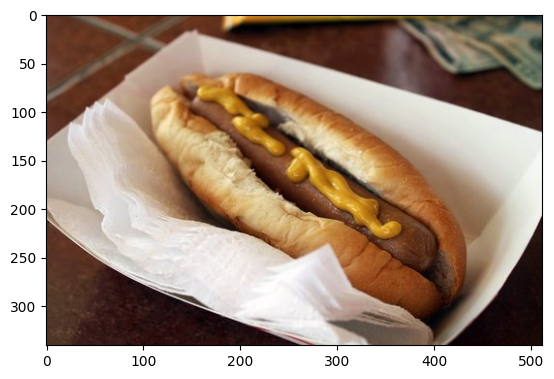

In [ ]:
plt.imshow(image_data)

## Model definition


In [ ]:
# here we define some important parameter that are going to be used in both models

num_classes = 2

image_resize = 224

batch_size_training = 8
batch_size_validation = 8

In [ ]:
# instantiate the image data generator
data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

Now we can generate train and validation set with ImageDataGenerator

In [ ]:
train_generator = data_generator.flow_from_directory(
    '/content/drive/MyDrive/seefood/train',
    target_size=(image_resize, image_resize),
    batch_size=batch_size_training,
    class_mode='categorical',
    seed=42
    )

Found 498 images belonging to 2 classes.


In [ ]:
validation_generator = data_generator.flow_from_directory(
    '/content/drive/MyDrive/seefood/valid',
    target_size=(image_resize, image_resize),
    batch_size=batch_size_validation,
    class_mode='categorical'
)

Found 500 images belonging to 2 classes.


In [ ]:
class_names = {y: x for x, y in validation_generator.class_indices.items()}
class_names

{0: 'hot_dog', 1: 'not_hot_dog'}

Here we define some optimization parameters that are going to be used with both models.

In [ ]:
steps_per_epoch_training = len(train_generator)
steps_per_epoch_validation = len(validation_generator)
num_epochs = 4
print(steps_per_epoch_training,steps_per_epoch_validation)

63 63


## Build the model

### we start with the tailored-made CNN model

In [ ]:
input = Input(shape=(image_resize,image_resize,3,)) # (None,224,224,3)

conv1 = Conv2D(32,(5,5),activation='relu',padding="same")(input) # (None,224,224,32)
pool1 = MaxPooling2D(pool_size=(2,2))(conv1) # (None,112,112,32)

conv2 = Conv2D(64,(3,3),activation='relu',padding="same")(pool1) # (None,112,112,64)
pool2 = MaxPooling2D(pool_size=(2,2))(conv2) # (None,56,56,64)

conv3 = Conv2D(32,(3,3),activation='relu',padding="same")(pool2) # (None,56,56,32)
pool3 = MaxPooling2D(pool_size=(2,2))(conv3) # (None,28,28,32)

conv4 = Conv2D(32,(3,3),activation='relu',padding="same")(pool3) # (None,28,28,32)
pool4 = MaxPooling2D(pool_size=(2,2))(conv3) # (None,28,28,32)

conv4 = Conv2D(32,(3,3),activation='relu',padding="same")(pool4) # (None,28,28,64)
pool4 = MaxPooling2D(pool_size=(2,2))(conv4) # (None,14,14,32)

flat = Flatten()(pool4) # (None, 6272)

drop = Dropout(0.2)(flat) # (None, 6272)

fully = Dense(512,activation='relu')(drop) # (None, 512)
pred = Dense(num_classes,activation='softmax')(fully) # (None, 2)

model_cnn = Model(inputs=input, outputs=pred)

model_cnn.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 32)        18464 

In [ ]:
model_cnn.layers

In [ ]:
model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
%%time
fit_cnn = model_cnn.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch_training,
    epochs=num_epochs,
    validation_data=validation_generator,
    validation_steps=steps_per_epoch_validation,
    verbose="auto",
)

Epoch 1/4
63/63 [==============================] - 229s 4s/step - loss: 11.3323 - accuracy: 0.5361 - val_loss: 0.6869 - val_accuracy: 0.5640
Epoch 2/4
63/63 [==============================] - 80s 1s/step - loss: 0.6834 - accuracy: 0.5643 - val_loss: 0.7164 - val_accuracy: 0.5020
Epoch 3/4
63/63 [==============================] - 86s 1s/step - loss: 0.6311 - accuracy: 0.6365 - val_loss: 0.6839 - val_accuracy: 0.5680
Epoch 4/4
63/63 [==============================] - 79s 1s/step - loss: 0.6007 - accuracy: 0.6546 - val_loss: 0.6969 - val_accuracy: 0.5440
CPU times: user 7min 24s, sys: 51.6 s, total: 8min 16s
Wall time: 8min 32s


In [ ]:
# Save the model to a file
model_cnn.save('classifier_cnn_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


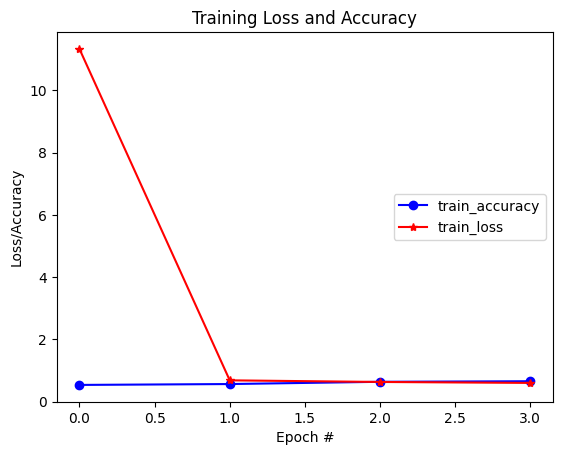

In [ ]:
# Model accuracy and loss vs epoch
plt.plot(fit_cnn.history['accuracy'], '-bo', label="train_accuracy")
plt.plot(fit_cnn.history['loss'], '-r*', label="train_loss")
plt.title('Training Loss and Accuracy')
plt.ylabel('Loss/Accuracy')
plt.xlabel('Epoch #')
plt.legend(loc='center right')
plt.show()

# VGG16

## Now that we trained and saved the CNN model, we train a pre-trained model based on the VGG16 model.

In [ ]:
base_model = VGG16(weights='imagenet', include_top=False) #imports the VGG16 model and discards the last layer.
x = base_model.output # (None, None, None, 512)
x = tf.keras.layers.GlobalAveragePooling2D()(x) # (None, 512)

x = Dropout(0.2)(x) # (None, 512)
x = Dense(256,activation='relu')(x) # (None, 256)
x = Dropout(0.2)(x) # (None, 256)

preds = Dense(num_classes,activation='softmax')(x) #final layer with softmax activation

model_vgg = Model(inputs=base_model.input, outputs=preds)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
base_model.input

<KerasTensor: shape=(None, None, None, 3) dtype=float32 (created by layer 'input_2')>

We can print the layers of the full model as well as the base model only.

In [ ]:
model_vgg.layers

In [ ]:
base_model.layers

In [ ]:
#Freeze layers from VGG16 backbone (not to be trained)
for layer in base_model.layers:
    layer.trainable=False

model_vgg.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0   

In [ ]:
model_vgg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
%%time

num_epochs = 4

start_datetime = datetime.now()

fit_vgg = model_vgg.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch_training,
    epochs=num_epochs,
    validation_data=validation_generator,
    validation_steps=steps_per_epoch_validation,
    verbose="auto",
)

end_datetime = datetime.now()
print('Training Duration: ' + str(end_datetime-start_datetime))

Epoch 1/4
63/63 [==============================] - 638s 10s/step - loss: 1.7114 - accuracy: 0.7711 - val_loss: 1.5607 - val_accuracy: 0.7680
Epoch 2/4
63/63 [==============================] - 634s 10s/step - loss: 0.9697 - accuracy: 0.8474 - val_loss: 1.0449 - val_accuracy: 0.8260
Epoch 3/4
63/63 [==============================] - 637s 10s/step - loss: 0.7195 - accuracy: 0.8876 - val_loss: 1.4108 - val_accuracy: 0.8180
Epoch 4/4
63/63 [==============================] - 625s 10s/step - loss: 0.4415 - accuracy: 0.9076 - val_loss: 0.7003 - val_accuracy: 0.8700
Training Duration: 0:42:14.120089
CPU times: user 1h 4min 11s, sys: 2min 36s, total: 1h 6min 47s
Wall time: 42min 14s


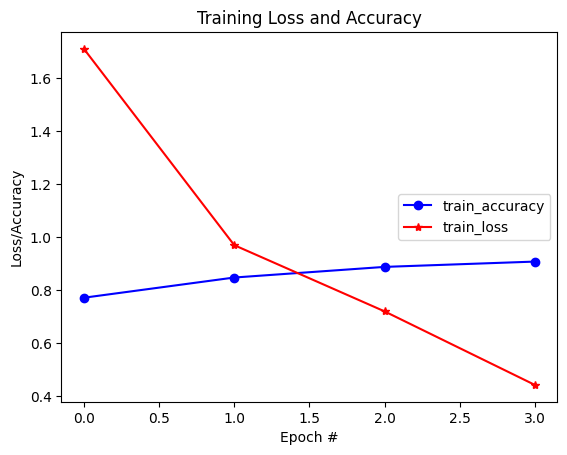

In [ ]:
# Model accuracy and loss vs epoch
plt.plot(fit_vgg.history['accuracy'], '-bo', label="train_accuracy")
plt.plot(fit_vgg.history['loss'], '-r*', label="train_loss")
plt.title('Training Loss and Accuracy')
plt.ylabel('Loss/Accuracy')
plt.xlabel('Epoch #')
plt.legend(loc='center right')
plt.show()

In [ ]:
# Save the model to a file
model_vgg.save('classifier_vgg_model.h5')

#  Persist the models and evaluate on the test set

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input

from keras.models import load_model


In this step we load the saved models and evaluate them on the test set

In [ ]:
!ls /content/drive/MyDrive/seefood/

test  train  valid


In [ ]:
# instantiate image data generator
data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

In [ ]:
test_generator = data_generator.flow_from_directory(
    '/content/drive/MyDrive/seefood/test',
    target_size=(image_resize, image_resize),
    shuffle=True,
    class_mode='categorical'
)

Found 100 images belonging to 2 classes.


In [ ]:
class_names = {y: x for x, y in test_generator.class_indices.items()}
class_names

{0: 'hot_dog', 1: 'not_hot_dog'}

In [ ]:
batch_image = test_generator[0][0][:8]
batch_class= test_generator[0][1][:8]
print(batch_image.shape)

batch_names = [class_names[i] for i in batch_class[:,1]]
batch_names

(8, 224, 224, 3)


['hot_dog',
 'not_hot_dog',
 'hot_dog',
 'not_hot_dog',
 'hot_dog',
 'not_hot_dog',
 'hot_dog',
 'hot_dog']

In [ ]:
batch_class

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

We can plot a subset of the images and see how do they look like.

Notice that the images have been preprocessed using `keras.applications.vgg16.preprocess_input`

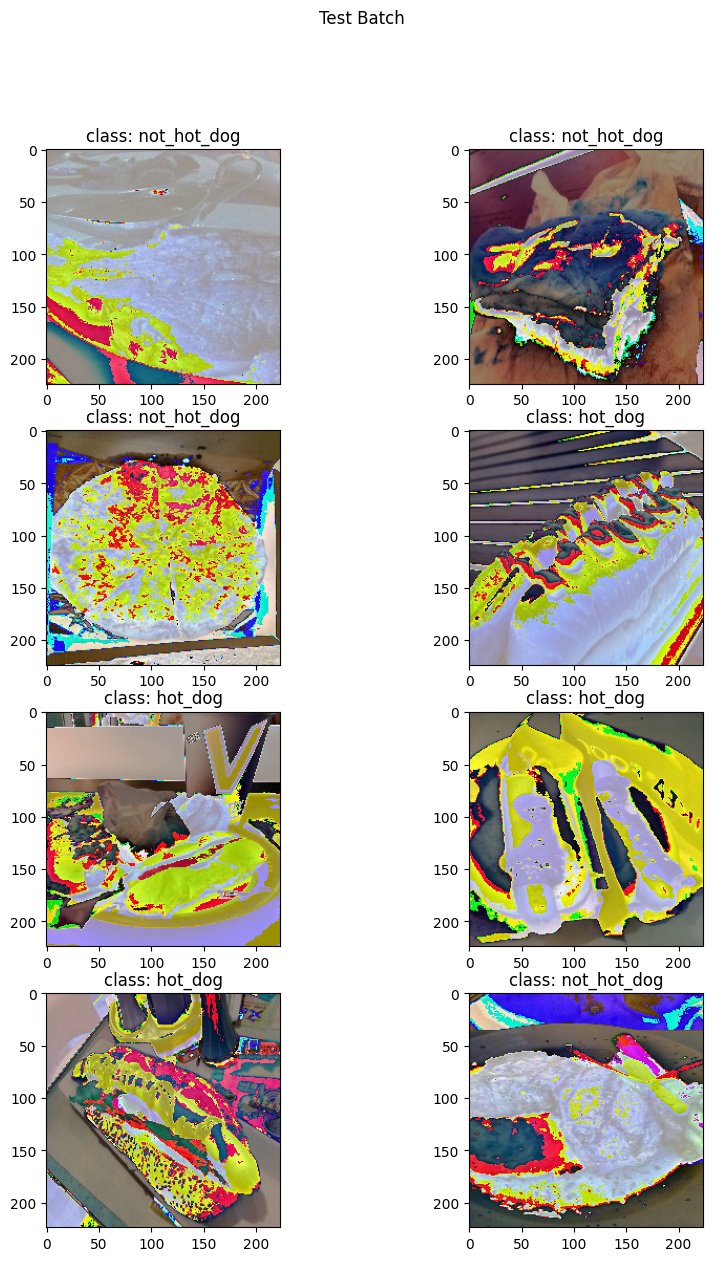

In [ ]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(10, 14)) # define your figure and axes

ind = 0
for ax1 in axs:
    for ax2 in ax1:
        image_data = batch_image[ind].astype(np.uint8)
        ax2.imshow(image_data)
        ax2.set_title('class: {}'.format(batch_names[ind]))
        ind += 1

fig.suptitle('Test Batch')
plt.show()

In [ ]:
# load the models

model_cnn = load_model('classifier_cnn_model.h5')

model_vgg = load_model('classifier_vgg_model.h5')

In [ ]:
# Evaluate CNN on test_generator

eval_cnn = model_cnn.evaluate(test_generator)
print('CNN Test loss: ', eval_cnn[0])
print('CNN Test Accuracy: ', eval_cnn[1])

CNN Test loss:  0.6593728065490723
CNN Test Accuracy:  0.6100000143051147


In [ ]:
# Evaluate pre-trained model on test_generator

eval_vgg = model_vgg.evaluate(test_generator)
print('VGG16 Test loss: ', eval_vgg[0])
print('VGG16 Test Accuracy: ', eval_vgg[1])

4/4 [==============================] - 59s 14s/step - loss: 0.3976 - accuracy: 0.9200
VGG16 Test loss:  0.39764198660850525
VGG16 Test Accuracy:  0.9200000166893005


## We clearly see that the VGG16 pre-trained model performs much better than our defined CNN model.